In [1]:
# import required packages
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/titanic.csv")

In [3]:
data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [6]:
data.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [7]:
data.shape

(891, 11)

In [8]:
891-687

204

In [9]:
data.drop("cabin",axis=1,inplace=True)

In [11]:
data.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

In [12]:
data["age"].dtype

dtype('float64')

In [13]:
data["embarked"].dtype

dtype('O')

In [14]:
data["age"].mean()

29.69911764705882

In [15]:
round(data["age"].mean())

30

In [16]:
data["age"] = data["age"].fillna(round(data["age"].mean()))

In [17]:
data.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    2
dtype: int64

In [18]:
data["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [19]:
data["embarked"] = data["embarked"].fillna("S")

In [20]:
data.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [21]:
data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
data.drop("name",axis=1,inplace=True)

In [23]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked'],
      dtype='object')

In [24]:
data.drop("ticket",axis=1,inplace=True)

In [25]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [26]:
data["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [28]:
data["embarked"].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
lab = LabelEncoder()

In [32]:
data["sex"] = lab.fit_transform(data["sex"])

In [33]:
data["sex"]

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int32

In [35]:
data["embarked"] = lab.fit_transform(data["embarked"])

In [36]:
data["embarked"].head()

0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int32

In [37]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [38]:
# select the features and target
input1 = data.drop("survived",axis=1)
input1.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [39]:
output1 = data["survived"]

In [40]:
data["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [41]:
# split the data for training and testing

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(input1,output1,test_size=0.3,random_state = 2)

In [45]:
# select the model
from sklearn.svm import SVC

In [46]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 | 

In [48]:
sv = SVC(kernel ="linear")

In [49]:
sv.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
p = sv.predict(x_test)

In [57]:
p

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
accuracy_score(y_test,p)

0.7686567164179104

In [61]:
confusion_matrix(y_test,p)

array([[139,  21],
       [ 41,  67]], dtype=int64)

In [62]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       160
           1       0.76      0.62      0.68       108

   micro avg       0.77      0.77      0.77       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.77      0.77      0.76       268



# Decision tree Classifier

In [63]:
import pandas as pd

In [64]:
from sklearn.datasets import load_iris

In [65]:
iris = load_iris()

In [66]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [67]:
input_data = pd.DataFrame(iris.data,columns=['sepal length (cm)','sepal width (cm)',
                                             'petal length (cm)','petal width (cm)'])

In [68]:
input_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
output_data = pd.DataFrame(iris.target,columns = ["target"])

In [70]:
output_data.head()

,target
0,0
1,0
2,0
3,0
4,0


In [71]:
input_data.shape

(150, 4)

In [72]:
output_data.shape

(150, 1)

In [73]:
input_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [75]:
output_data.isnull().sum()

target    0
dtype: int64

In [76]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [77]:
output_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
target    150 non-null int32
dtypes: int32(1)
memory usage: 680.0 bytes


In [78]:
# spliting the data for training and testing

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,
                                                 test_size=0.3,random_state=3)

In [81]:
# select the model

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtc = DecisionTreeClassifier()

In [84]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
#predict the data

In [86]:
pred = dtc.predict(x_test)

In [87]:
pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2])

In [88]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [89]:
accuracy_score(y_test,pred)

0.9777777777777777

In [90]:
confusion_matrix(y_test,pred)

array([[17,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 14]], dtype=int64)

In [92]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Graphviz

### Pydotplus

- conda install graphviz
- conda install pydotplus

In [93]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Alekhya\Anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.7.5   |       haa95532_1         149 KB
    certifi-2021.5.30          |   py37haa95532_0         142 KB
    conda-4.10.3               |   py37haa95532_0         3.1 MB
    ------------------------------------------------------------
                                           Total:         3.4 MB

The following packages will be UPDATED:

  ca-certificates                      2021.5.25-haa95532_1 --> 2021.7.5-haa95532_1
  certifi                          2020.12.5-py37haa95532_0 --> 2021.5.30-py37haa95532_0
  conda                               4.10.1-py37haa95532_1 --> 4.10.3-py37haa95532_0




ca-certificates-2021 | 149 KB    |            |   0% 
ca-certificates-2

In [94]:
conda install pydotplus

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [95]:
from sklearn.tree import export_graphviz

In [96]:
import pydotplus

In [97]:
from IPython.display import Image

In [98]:
from sklearn.externals.six import StringIO

In [101]:
dot_data = StringIO()
export_graphviz(dtc,out_file = "iris.dot",feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True,filled = True)

In [100]:
help(export_graphviz)

Help on function export_graphviz in module sklearn.tree.export:

export_graphviz(decision_tree, out_file=None, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)
    Export a decision tree in DOT format.
    
    This function generates a GraphViz representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::
    
        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    Read more in the :ref:`User Guide <tree>`.
    
    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be exported to Gra

In [102]:
dot_data1 = StringIO()
export_graphviz(dtc,out_file =dot_data1,feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True,filled = True)

In [106]:
puplot = pydotplus.graph_from_dot_data(dot_data1.getvalue())
print(puplot)

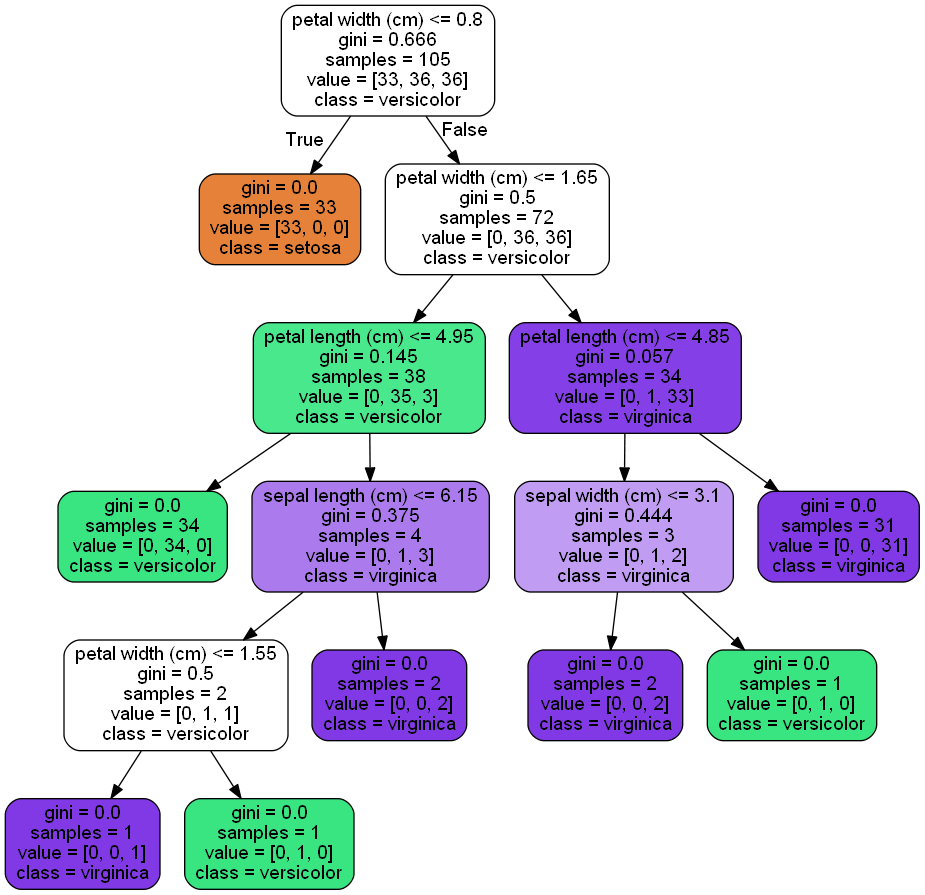

In [104]:
Image(puplot.create_png())